In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

No module named 'rtlsdr'


In [2]:
df = pd.read_csv('data/data_012822')
x = np.arange(2048)

# Section 5.4

In [3]:
ugradio.dft.dft??

Signature: ugradio.dft.dft(xt, t=[], f=[], vsamp=1)
Source:   
def dft(xt,t=[],f=[],vsamp=1):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    f     : The same frequencies input
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        #vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx
File:      ~/opt/anaconda3/lib/python3.7/site-packages/ugradio/dft.py
Type:      function


In [4]:
len(df['data_%s'%('2200')])

2048

In [5]:
def volt_spec(sample, sampling_rate):
    data = df['data_%s'%(sample)]
    Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-sampling_rate/2.,sampling_rate/2.,num=Nfreq,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec(sample, sampling_rate): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample, sampling_rate)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

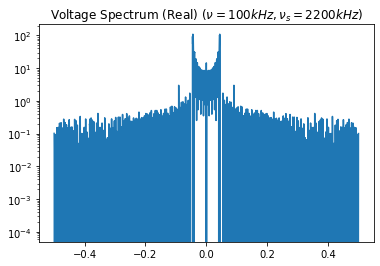

In [6]:
volt_2200 = volt_spec('2200', 1)
plt.figure()
plt.title(r'Voltage Spectrum (Real) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].real)

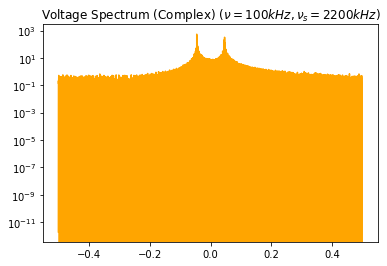

In [7]:
plt.figure()
plt.title(r'Voltage Spectrum (Complex) $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.semilogy(volt_2200[0], volt_2200[1].imag, color = 'orange')

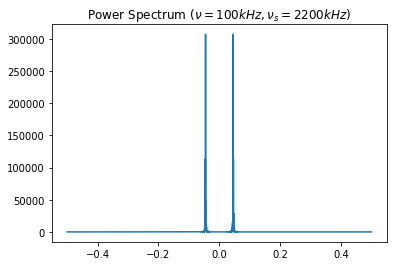

In [8]:
power_2200 = power_spec('2200', 1)
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz)$')
plt.plot(power_2200[0], power_2200[1].real)

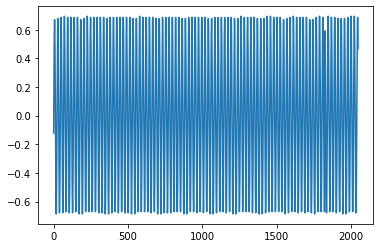

In [9]:
data = df['data_%s'%('2200')]
plt.figure()
plt.plot(data)
plt.show()

# Section 5.6

In [10]:
def volt_spec_W(sample, sampling_rate, W):
    data = df['data_%s'%(sample)]
    #Nfreq=int(10*len(data))
    fourier = ugradio.dft.dft(
        data,
        f=np.linspace(-W*sampling_rate/2.,W*sampling_rate/2.,endpoint=False),
        vsamp=sampling_rate
    )
    return fourier

def power_spec_W(sample, sampling_rate, W): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec_W(sample, sampling_rate, W)
    return volt[0], np.abs(volt[1])**2 #returns power spectrum of specified frequencies

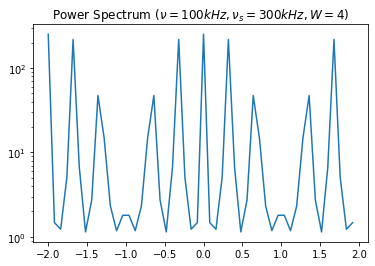

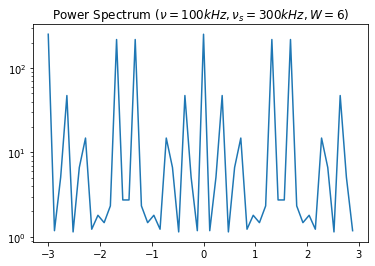

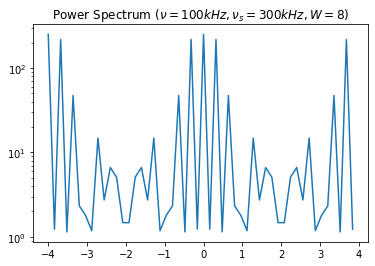

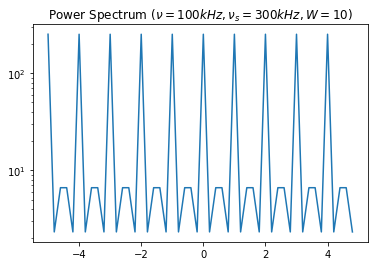

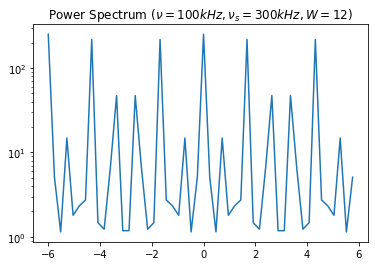

In [69]:
W_list = [2*x + 4 for x in range(5)]
for W in W_list:
    power_2200 = power_spec_W('300', 1, W)
    plt.figure()
    plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 300 kHz, W = ' + str(W) + r')$')
    plt.yscale('log')
    plt.plot(power_2200[0], power_2200[1])

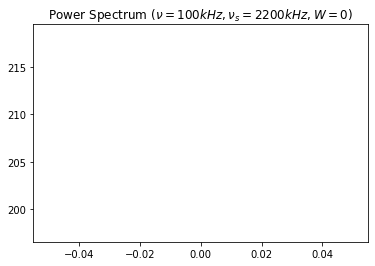

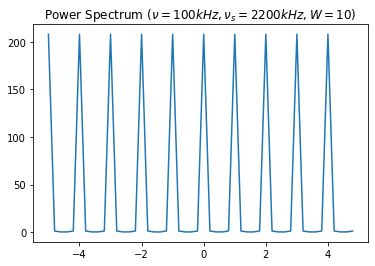

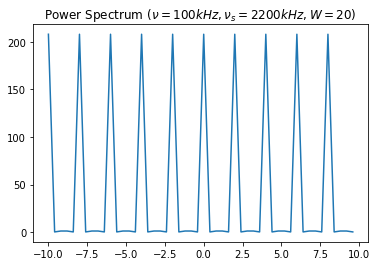

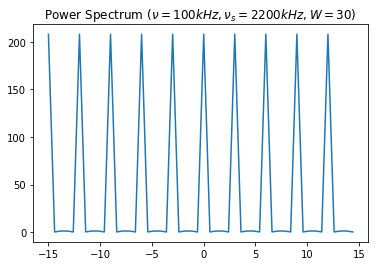

In [66]:
W_list = [(10*x) for x in range(4)]
for W in W_list:
    power_2200 = power_spec_W('2200', 1, W)
    plt.figure()
    plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 2200 kHz, W = ' + str(W) + r')$')
    plt.plot(power_2200[0], power_2200[1])

# Section 5.5

In [12]:
res_data = pd.read_csv('data/res_data_013122')
res_data

,Unnamed: 0,data_10,data_4,data_1,data_05
0,0,0.035294,1.000000,1.000000,-0.780392
1,1,0.050980,1.000000,1.000000,-1.000000
2,2,0.058824,1.000000,1.000000,-1.000000
3,3,0.050980,0.921569,1.000000,-1.000000
4,4,0.043137,0.694118,1.000000,-1.000000
...,...,...,...,...,...
2043,2043,1.000000,-0.725490,0.207843,-0.278431
2044,2044,1.000000,-1.000000,0.537255,-0.505882
2045,2045,1.000000,-1.000000,0.827451,-0.772549
2046,2046,1.000000,-1.000000,1.000000,-0.905882


In [13]:
data_10 = res_data['data_10']
data_4 = res_data['data_4']
data_1 = res_data['data_1']
data_05 = res_data['data_05']

In [14]:
def power_spec(data):
    fourier = ugradio.dft.dft(data)
    power = np.abs(fourier[1])**2
    return fourier[0], power

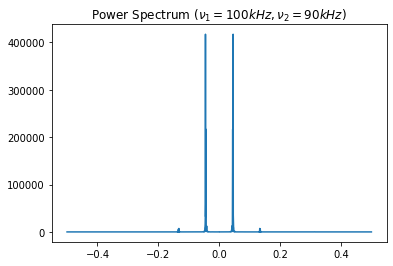

In [15]:
power_spec_10 = power_spec(data_10)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 90 kHz)$')
plt.plot(power_spec_10[0], power_spec_10[1])

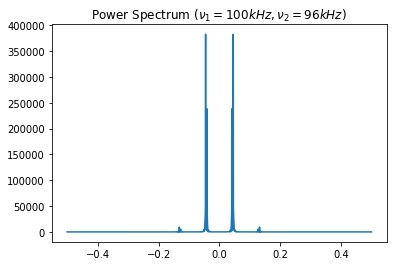

In [16]:
power_spec_4 = power_spec(data_4)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 96 kHz)$')
plt.plot(power_spec_4[0], power_spec_4[1])

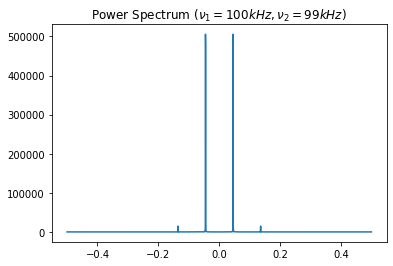

In [17]:
power_spec_1 = power_spec(data_1)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99 kHz)$')
plt.plot(power_spec_1[0], power_spec_1[1])

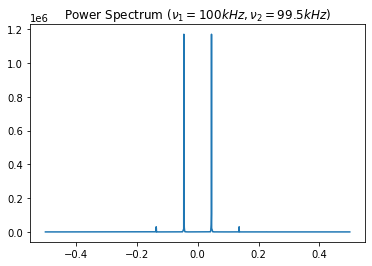

In [18]:
power_spec_05 = power_spec(data_05)
plt.figure()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99.5 kHz)$')
plt.plot(power_spec_05[0], power_spec_05[1])

Signature: ugradio.dft.dft(xt, t=[], f=[], vsamp=1)
Docstring:
Input 
-----
xt    : complex array, input time domain signal
t     : (opt.) real array, input sample times. 
f     : (opt.) real array, output sample frequencies
vsamp : (opt.) float, sampling frequency
        default: 1
Output
------
f     : The same frequencies input
Fx    : The discrete fourier transform of the input array
File:      ~/opt/anaconda3/lib/python3.7/site-packages/ugradio/dft.py
Type:      function
